In [2]:
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

In [3]:
df_train = pd.read_csv("/data/train.csv")
df_test = pd.read_csv("/data/test.csv")

In [4]:
forest = IsolationForest(random_state=16, contamination=.001)

In [5]:
forest.fit(df_train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


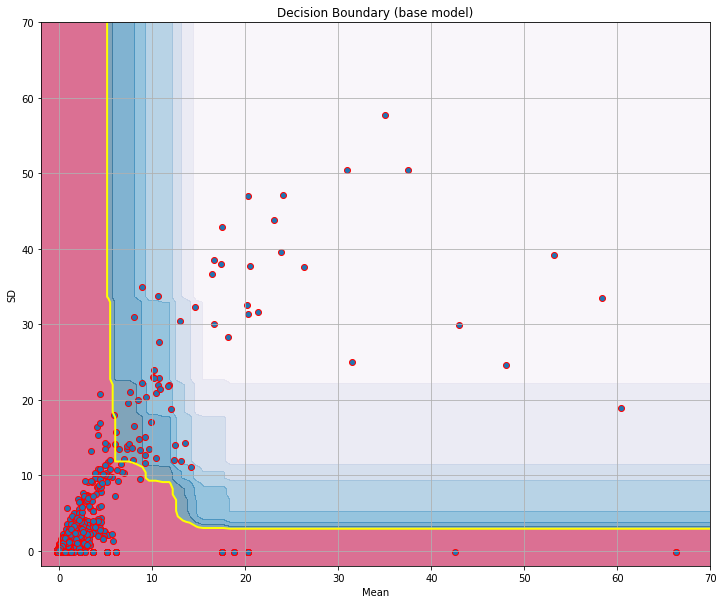

In [63]:
import matplotlib.pyplot as plt

# Change the plot's size.
plt.rcParams['figure.figsize'] = '12,10'
# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='yellow')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_train.iloc[:, 0],
            df_train.iloc[:, 1],
            edgecolors='r')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [105]:
rated = forest.predict(df_test)

In [115]:
merged = pd.concat([df_test, pd.Series(rated)], axis=1)

In [137]:
outsiders = merged.loc[merged.iloc[:,2]==-1]
insiders = merged.loc[merged.iloc[:,2]==1]

In [133]:
outsiders.iloc[:,1]

1584     14.321710
2042     21.110965
3332     31.300607
4026     13.037474
4762     26.761999
8337     13.015596
9066     51.785813
9368     24.249862
9956     31.615822
10345    14.153271
11336    16.890730
11452    24.976692
13338    33.413712
Name: sd, dtype: float64

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


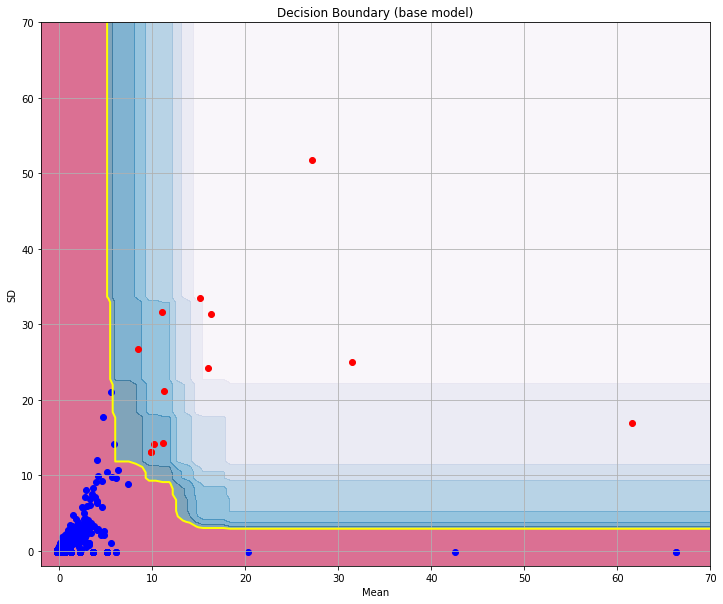

In [140]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = '12,10'
# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard fram the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='yellow')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(outsiders.iloc[:,0], outsiders.iloc[:, 1], c='r')
plt.scatter(insiders.iloc[:, 0], insiders.iloc[:, 1], c='b')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [143]:
from joblib import dump, load

In [144]:
dump(forest, filename="model.joblib", )

['model.joblib']